In [11]:
import json

with open('results.json') as f:
    results = json.load(f)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [14]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. blank: 0.1183
	2. up: 0.1079
	3. angle: 0.1033
	4. canvas: 0.1005
	5. red: 0.0960
	6. rotate: 0.0902
	7. blue: 0.0899
	8. shape: 0.0897
	9. position: 0.0841
	10. round: 0.0822
	11. three: 0.0774
	12. green: 0.0763
	13. white: 0.0763
	14. color: 0.0758
	15. unrotate: 0.0713
	16. right: 0.0674
	17. this: 0.0663
	18. is: 0.0568
	19. bottom: 0.0546
	20. four: 0.0535
	21. left: 0.0427
	22. has: 0.0394
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


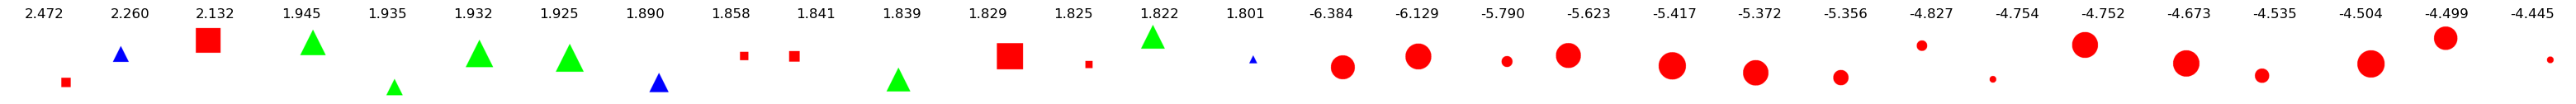

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. canvas: 0.2389
	2. is: 0.1878
	3. round: 0.1469
	4. red: 0.1402
	5. green: 0.1133
	6. bottom: 0.1095
	7. blue: 0.0916
	8. unrotate: 0.0822
	9. this: 0.0792
	10. blank: 0.0776
	11. rotate: 0.0753
	12. up: 0.0722
	13. position: 0.0682
	14. angle: 0.0548
	15. left: 0.0469
	16. has: 0.0430
	17. four: 0.0419
	18. three: 0.0371
	19. right: 0.0355
	20. shape: 0.0251
	21. white: 0.0169
	22. color: 0.0128
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


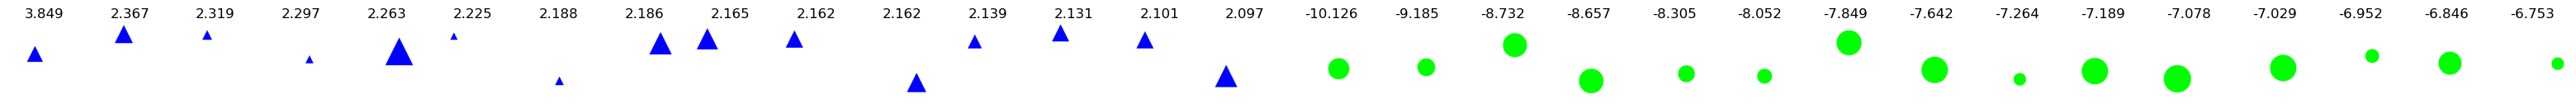

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. color: 0.2436
	2. shape: 0.1119
	3. right: 0.1089
	4. has: 0.1029
	5. white: 0.0979
	6. four: 0.0851
	7. blank: 0.0832
	8. up: 0.0738
	9. position: 0.0704
	10. three: 0.0701
	11. angle: 0.0672
	12. green: 0.0609
	13. this: 0.0559
	14. blue: 0.0555
	15. bottom: 0.0540
	16. left: 0.0530
	17. round: 0.0504
	18. rotate: 0.0386
	19. unrotate: 0.0370
	20. red: 0.0205
	21. is: 0.0202
	22. canvas: 0.0119
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


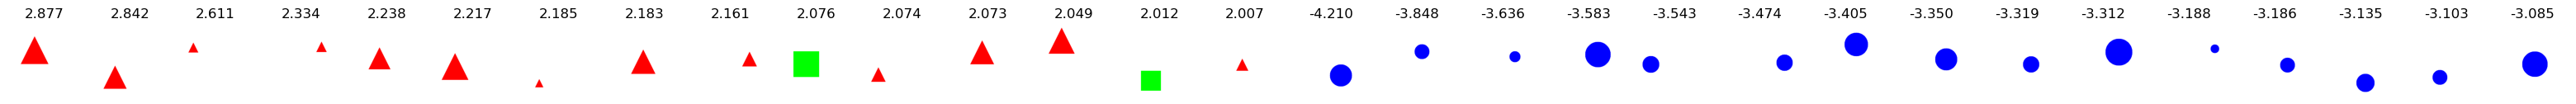

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. has: 0.1491
	2. left: 0.1356
	3. four: 0.1297
	4. this: 0.1063
	5. right: 0.0979
	6. bottom: 0.0978
	7. three: 0.0963
	8. shape: 0.0936
	9. color: 0.0931
	10. position: 0.0910
	11. unrotate: 0.0812
	12. green: 0.0604
	13. is: 0.0597
	14. angle: 0.0555
	15. blue: 0.0551
	16. white: 0.0544
	17. up: 0.0522
	18. round: 0.0492
	19. rotate: 0.0448
	20. blank: 0.0414
	21. red: 0.0255
	22. canvas: 0.0157
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


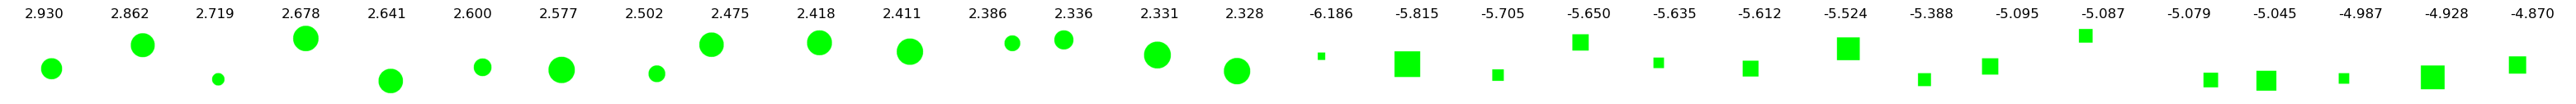

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. round: 0.1332
	2. blue: 0.1306
	3. has: 0.1274
	4. green: 0.1186
	5. right: 0.1097
	6. angle: 0.1042
	7. this: 0.1042
	8. unrotate: 0.1036
	9. blank: 0.0994
	10. canvas: 0.0939
	11. red: 0.0922
	12. bottom: 0.0848
	13. up: 0.0838
	14. rotate: 0.0657
	15. is: 0.0627
	16. left: 0.0601
	17. white: 0.0564
	18. four: 0.0507
	19. position: 0.0454
	20. color: 0.0369
	21. shape: 0.0304
	22. three: 0.0266
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


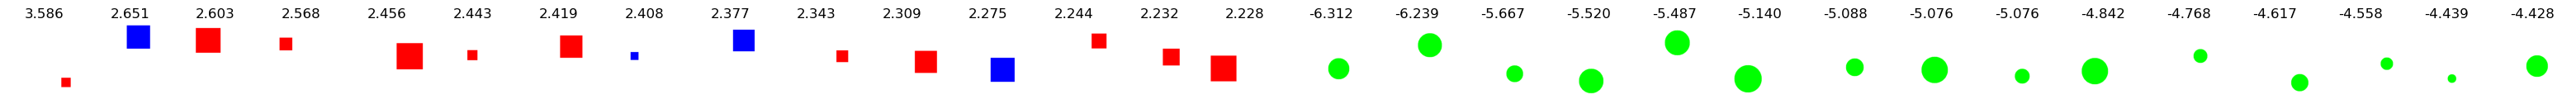

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. canvas: 0.1734
	2. green: 0.1666
	3. blank: 0.1535
	4. round: 0.1303
	5. is: 0.1266
	6. red: 0.1240
	7. up: 0.1095
	8. rotate: 0.1081
	9. blue: 0.1029
	10. bottom: 0.0925
	11. angle: 0.0789
	12. position: 0.0663
	13. shape: 0.0630
	14. right: 0.0517
	15. white: 0.0517
	16. color: 0.0496
	17. this: 0.0385
	18. unrotate: 0.0374
	19. three: 0.0365
	20. four: 0.0335
	21. left: 0.0187
	22. has: 0.0141
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


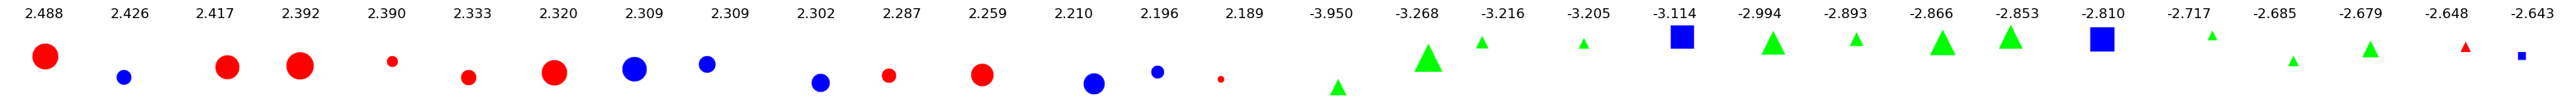

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. white: 0.1331
	2. three: 0.1214
	3. left: 0.1197
	4. shape: 0.1086
	5. rotate: 0.1067
	6. unrotate: 0.1049
	7. color: 0.0960
	8. four: 0.0944
	9. position: 0.0942
	10. right: 0.0833
	11. is: 0.0795
	12. angle: 0.0747
	13. red: 0.0744
	14. bottom: 0.0671
	15. this: 0.0624
	16. blue: 0.0583
	17. up: 0.0572
	18. green: 0.0450
	19. blank: 0.0401
	20. canvas: 0.0387
	21. has: 0.0364
	22. round: 0.0264
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


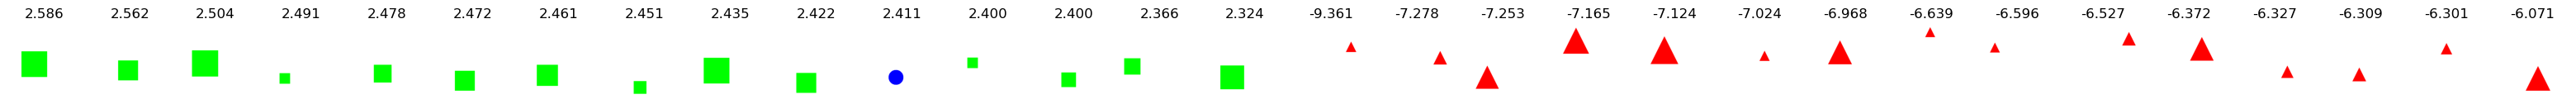

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. has: 0.1915
	2. round: 0.1180
	3. this: 0.1079
	4. bottom: 0.1075
	5. four: 0.0989
	6. left: 0.0929
	7. position: 0.0901
	8. right: 0.0856
	9. green: 0.0841
	10. up: 0.0782
	11. color: 0.0769
	12. blank: 0.0722
	13. blue: 0.0713
	14. unrotate: 0.0672
	15. three: 0.0667
	16. is: 0.0637
	17. shape: 0.0588
	18. angle: 0.0527
	19. rotate: 0.0414
	20. white: 0.0374
	21. red: 0.0369
	22. canvas: 0.0323
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


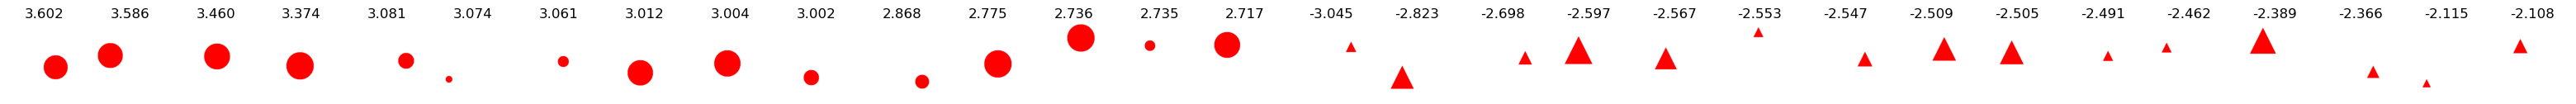

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. white: 0.1383
	2. left: 0.1378
	3. rotate: 0.1152
	4. three: 0.1081
	5. position: 0.1076
	6. four: 0.1015
	7. red: 0.0995
	8. unrotate: 0.0952
	9. is: 0.0937
	10. color: 0.0924
	11. shape: 0.0861
	12. bottom: 0.0816
	13. right: 0.0712
	14. this: 0.0683
	15. up: 0.0619
	16. blue: 0.0489
	17. angle: 0.0476
	18. canvas: 0.0428
	19. has: 0.0407
	20. green: 0.0345
	21. blank: 0.0323
	22. round: 0.0316
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


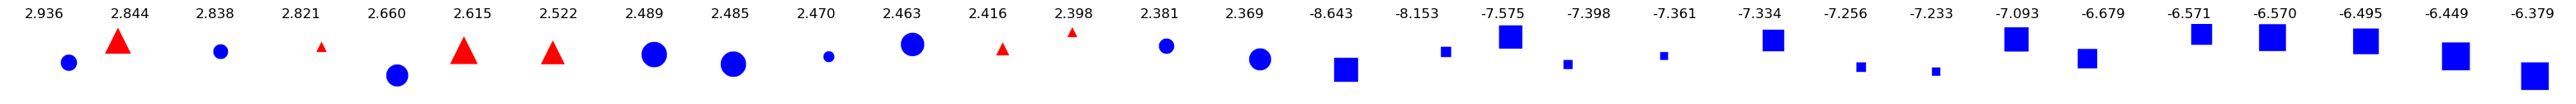

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. blank: 0.1409
	2. angle: 0.1327
	3. has: 0.1218
	4. round: 0.1193
	5. blue: 0.1172
	6. up: 0.1094
	7. this: 0.1043
	8. right: 0.1033
	9. green: 0.0967
	10. unrotate: 0.0747
	11. canvas: 0.0672
	12. color: 0.0632
	13. shape: 0.0612
	14. white: 0.0594
	15. red: 0.0582
	16. bottom: 0.0538
	17. rotate: 0.0534
	18. position: 0.0519
	19. four: 0.0509
	20. three: 0.0410
	21. left: 0.0388
	22. is: 0.0284
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


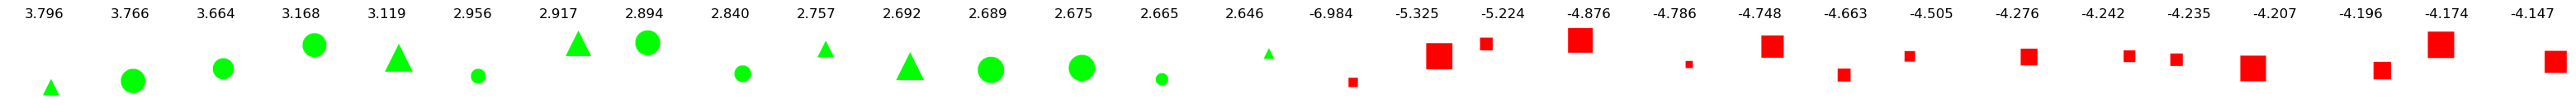

----------------------------------------------------------------------------------------------------


In [15]:
for i in range(10):
    visualize_concept(i)